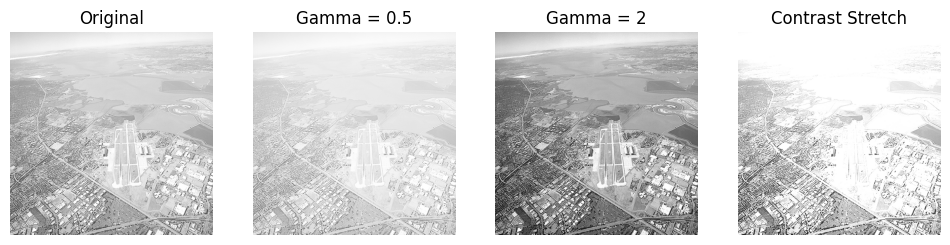

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def gamma_correction(img, gamma):
    img = img.astype(np.float32) / 255.0
    out = np.power(img, gamma)
    return np.uint8(out * 255)

def contrast_stretch(img, r1=0.2, r2=0.8):
    img = img.astype(np.float32) / 255.0
    out = np.zeros_like(img)

    out[img < r1] = 0
    mask = (img >= r1) & (img <= r2)
    out[mask] = (img[mask] - r1) / (r2 - r1)
    out[img > r2] = 1

    return np.uint8(out * 255)

# ---- LOAD IMAGE SAFELY ----
image_path = "../data/original/runway.png"

if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found: {image_path}")

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# ---- PROCESS ----
gamma_05 = gamma_correction(img, 0.5)
gamma_2 = gamma_correction(img, 2)
contrast = contrast_stretch(img)

# ---- SAVE RESULTS ----
os.makedirs("../data/processed/q1", exist_ok=True)

cv2.imwrite("../data/processed/q1/gamma_05.png", gamma_05)
cv2.imwrite("../data/processed/q1/gamma_2.png", gamma_2)
cv2.imwrite("../data/processed/q1/contrast.png", contrast)

# ---- DISPLAY ----
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(gamma_05, cmap='gray')
plt.title("Gamma = 0.5")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(gamma_2, cmap='gray')
plt.title("Gamma = 2")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(contrast, cmap='gray')
plt.title("Contrast Stretch")
plt.axis("off")

plt.show()


In [17]:
pip install matplotlib

  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
